## FDR （false discovery rate）
參考網址超連結1 : [FDR錯誤發現率-P值校正學習](https://www.twblogs.net/a/5ef0c3254a766ac09210aa72)

參考網址超連結2 : [ 多重檢定問題，false discovery rate (FDR)與 q 值 .pdf](http://biostat.tmu.edu.tw/oldFile/enews/ep_download/17stat.pdf)

*   提要 :

    <font color = red>當同時進行多個檢定時，犯型一錯誤之機率會增加</font> ( 例如兩檢定獨立，且 $\alpha = 0.05$ 時，至少有一個檢定犯型一錯誤機率為 $1-0.95^2 = 0.0975 > 0.05$ )。\
    檢定個數越多，犯型一錯誤之機率就越高，此種錯誤稱為全體型I錯誤 (overall type I error) 或實驗型I錯誤 (experimentwise type I error)，常以$\alpha_{EW}$表示。\
    這個現象被稱為<font color = red>多重檢定問題（multiple testing problem）</font>。



*   定義 : 

    FDR 是統計學中常見的一個名詞，翻譯爲僞發現率，其意義爲是 <font color = red> 錯誤拒絕（Type I error : H_0 為真卻拒絕 H0）的個數佔所有被拒絕的原假設個數的比例的期望值</font>。

    <font color = red>FDR是個期望值</font>

*   使用時機例子 : 

    有個表記錄著某個產品其 不同零件的重量(x1,...,xn) 和 產品5年內是否損壞(y=0,1). 有時因為參數(x)過多要刪減, 去選擇參數時使用 T-test 檢定每個參數 y=0和1時是否有差異, 因為參數過多所以導致檢定次數太多, 就有多重檢定的問題要解決.

[圖片來源](https://www.jianshu.com/p/13f46bebebd4), 注 : positive 指 reject $H_0$ \
<img src="https://upload-images.jianshu.io/upload_images/4264437-36a5108a736e06b5.png?imageMogr2/auto-orient/strip|imageView2/2/w/1200/format/webp" width="50%" height="50%">


### 多重檢定問題解決方法

#### 定義符號
以下為參考 [ 多重檢定問題，false discovery rate (FDR)與 q 值 .pdf](http://biostat.tmu.edu.tw/oldFile/enews/ep_download/17stat.pdf)。\
為求方便，統一定義符號。

*   $m $ : 總檢定個數。(已知)
*   $m_0 $ : 虛無假設為真的個數。(未知)
*   $S $ : 拒絕虛無假設的個數。(已知)
*   $F $ : 虛無假設為真，拒絕虛無假設的個數 (發生型I錯誤的個數)。(未知)
*   $T $ : 對立假設為真，拒絕虛無假設的個數 。(未知)


<img src="https://i.imgur.com/ePc0Ja6.png" width="50%" height="50%">

#### Familywise error rate（FWER）

FWER的定義為 $Pr(F \geq 1 )$，即發生一次以上型一錯誤的機率。\
傳統上處理多重檢定問題最常使用的方法是控制 familywise error rate（FWER），最簡單的方法就是 Bonferroni 校正 : <font color = red>確保</font> FWER $\leq \alpha $，<font color = red>需將個別檢定可容許之型一錯誤率定為</font>$\frac{\alpha}{m}$。\
固定$ \alpha $，當檢定個數越多，$\frac{\alpha}{m}$ 越小，則越不容易拒絕虛無假設，因此對大量檢定進行 Bonferroni 校正時，會大幅度降低檢定力。


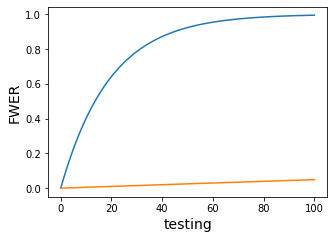

In [4]:
# 測試使用 Bonferroni 和 不使用 時, 發生 type I error 的機率分別為何.

import numpy as np
import matplotlib.pyplot as plt

# 原始 FWER
n = 100
p = np.linspace(0, n, n) # 檢定次數
a = 0.05 # alpha
FWER = 1 - (1-a)**p # 發生一次 type I error 的機率

# 修正後的 FWER
m = len(p)
new_a = a / m #使用 bonferroni 校正
BC = 1 - (1-new_a)**p # 校正後發生機率

plt.figure(figsize=(5, 3.5)) #圖大小
plt.plot(p, FWER) # 畫出發生機率和實驗次數的關係圖
plt.plot(p, BC)
plt.ylabel("FWER", fontsize=14)
plt.xlabel("testing", fontsize=14)
plt.show()

------

#### False discovery rate（FDR）

FDR為考慮顯著結果中型一錯誤的比例：$\frac{型一錯誤個數}{拒絕虛無假設個數} = \frac{F}{S}$，$\frac{F}{S}$ 為隨機變數。

Benjamini & Hochberg (1995)提出以$\frac{F}{S}$之期望值，作為所犯型一錯誤程度之度量</font>，稱為 false discovery rate（FDR）：$FDR = E[\frac{F}{S}]$ 。

Benjamini & Hochberg (1995)提出一個根據所得 $p$ 值，設定拒絕虛無假設的標準，以控制 FDR 的方法。令 $p_1,p_2,...,p_m $ 為 $m$ 個檢定所得之 $p$ 值。給定一個門檻 $q^*$，執行以下程序可使 $FDR \leq 𝑞^*$：

1.  令 $p_{(1)} \leq p_{(2)} \leq ... \leq p_{(m)} $ 為由小到大排序之 $p$ 值，並令 $H_{(i)}$ 代表對應於 $p_{(i)}$之虛無假設。

2.  令 $k$ 為最大的 $i$ 值，使得 $p_{(i)} \leq \frac{i}{m}q^* $ 成立，$ i = 1, ... , m$。

3.  拒絕虛無假設$H_{(i)}$，$i = 1, ... , k$




##### FDR 的 q 值

當進行多重檢定時，Storey & Tibshirani (2003)對每個檢定分別估計一個 q 值，作為其顯著性的一種度量。

對任意一個檢定 $i$ ，令 $p_i$ 及 $q_i$ 為對應之 $p$ 值與 $q$ 值。\
<font color = red>$q_i$ 的意義為，當稱檢定 $i$ 及其他 $p$ 值 ≤ $p_i$ 之檢定結果為顯著時，預期的型一錯誤比例。</font>

令 $ S(t) 、 F(t) $ 及 $FDR(t)$ 代表，以 $t$ 為檢定之顯著水準時，表一中的 $S 、F $ 及對應的 $FDR$。欲估計每個檢定對應之 q 值，需先估計 $FDR(t) ，0 < t \leq 1$。

&emsp;&emsp;&emsp; $ FDR(t) = E[\frac{F(t)}{S(t)}] \approx \frac{E[F(t)]}{E[S(t)]}$

$S(t)$ 為觀察到的，因此可用其觀察值 $\#\{p_i \leq t\}$ 估計 $E[S(t)]$。\
$F(t)$ 為未知且觀察不到，但虛無假設為真時，檢定所得之p值會均勻分布於 $[0,1]$，此時 $p \leq t $ 之機率即為t，故

&emsp;&emsp;　$E[F(t)] = m_0 \cdot t$

上式中，$m_0$ 為未知常數，其值可以下式估計：

&emsp;&emsp; $\hat{m_0} = \frac{ \#\{p_i > \lambda ~;~ i=1,...,m \}}{1- \lambda}$

式中 $\lambda$ 為在 0 與 1 之間適當選取之數值， $\lambda$ 之選取在 Storey & Tibshirani (2003)中有詳細的說明。

上述 $m_0$ 之估計乃基於：虛無假設為真時，檢定所得之 $p$ 值會均勻分布於 0 與 1 之間；對立假設為真時，檢定所得之 $p$ 值會有向 0 靠攏的趨勢。

例子如下圖，
此為 3170 基因的檢定在不同 p 下的長條圖，可發現 0 附近 p 值比例較高，代表有些基因有顯著差異。且大於 0.5 之 p 值分布相對均勻，並且高度皆低於虛線，換句話說，大部分的表現無顯著差異。

0.5 適合此例子之 $\lambda$ ，可以得到 $\frac{介於0.5與1之間的p值個數}{1-0.5}$ 為表現無顯著差異之基因數的合理估計。

由上可得，$FDR(t)$ 之估計為：$ \widehat{FDR}(t) = \frac{\hat{m_0}\cdot t}{\#\{p_i \leq t\}} $

由此 $\widehat{FDR}(t)$ 為基礎，另第 $i$ 個檢定之 p 值為 $p_i$　，則此檢定對應之 $q$ 值估計為 $\hat{q_i}(p_i) = \min\limits_{t\geq p_i} \widehat{FDR}(t)$

依據上式，給定多重檢定中的任兩個檢定 i 與 j ，若 $p_i \leq p_j$ 則 $ \widehat{q_i} \leq \widehat{q_j}$。

根據以上所定義的 $q$ 值，在進行多重檢定分析時，當給定一個門檻 $q^*$ ，並稱所有 $q$ 值  $\leq q^*$ 之檢定結果為顯著時，所得結果之 $FDR \leq q^*$ 。

<img src="https://imgur.com/6zXJXmC.jpg" width="30%" height="30%">

#### FDR R code
```R
set.seed(2023)
x <- rnorm(50, mean = c(rep(0, 25), rep(3, 25)))
p <- 2 * pnorm(sort(-abs(x)))

### 手動操作
FDR_test = c()
for (i in 1:length(p)){
  FDR_test = c(FDR_test, p[i] * length(p) / i)
}
for (i in length(p):2){
  if (FDR_test[i] < FDR_test[i-1]){
    FDR_test[i-1] = FDR_test[i]
  }
}
FDR_test #FDR

### 使用套件
p.adjust(p, "BH", n = 50) #FDR

## 輸出給 python 用
write.csv(x, file =  paste0(getwd(), "/python/分析相關/012.特徵相關/特徵分析/FDR_data.csv"))
```

------

#### FDR python code

In [18]:
#### FDR python code
import pandas as pd
from scipy.stats import norm

data_name = 'FDR_data.csv'
x = pd.read_csv(data_name)
x = x['x'].values
cdf = norm.cdf(sorted(-abs(x))) * 2
m = len(cdf)
FDR_test = [cdf[i] * m / (i+1) for i in range(m)]
for i in range(m-1, 0, -1): 
    if FDR_test[i] < FDR_test[i-1]:
        FDR_test[i-1] = FDR_test[i]
print(FDR_test)

[4.868748735140572e-07, 1.9352280819179603e-06, 0.00010556763847022995, 0.00023715409021484083, 0.0003639972566714332, 0.0003818572547967631, 0.0005013637822691158, 0.0010902030513907039, 0.0012246845434354045, 0.0022642245288555787, 0.0024198062632140886, 0.0024198062632140886, 0.0024198062632140886, 0.0030421945197301897, 0.0031959053061621444, 0.009768462400408278, 0.01186825855731064, 0.014383715169442686, 0.016915144418307854, 0.02604451072984798, 0.04146819826082011, 0.04146819826082011, 0.0621639378065814, 0.0675879250563592, 0.12156692507519884, 0.42885757405449476, 0.4615562869098564, 0.49171787955722296, 0.5427252102921412, 0.5427252102921412, 0.577899308614864, 0.577899308614864, 0.7347591297285098, 0.7360143227674284, 0.7360143227674284, 0.7360143227674284, 0.7360143227674284, 0.7360143227674284, 0.7360143227674284, 0.7663297469355242, 0.7663297469355242, 0.7663297469355242, 0.7663297469355242, 0.7663297469355242, 0.7663297469355242, 0.8083658302903732, 0.8175616288932298, 